In [1]:
import pandas as pd

In [2]:
fifa = pd.read_csv('./fifa.csv')

In [3]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
       out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
       out = float(out.replace('K', ''))*1000
    return float(out)

In [5]:
fifa['Wage'] = fifa['Wage'].apply(extract_value_from)

In [6]:
fifa['Value'] = fifa['Value'].apply(extract_value_from)

# 히트맵을 통한 상관관계 분석

나이, Overall, Potential, Value, Wage 들의 상관관계 분석

In [7]:
correlation_fifa = fifa[['Age', 'Overall', 'Potential', 'Value', 'Wage']]

In [8]:
correlation_fifa.head()

,Age,Overall,Potential,Value,Wage
0,31,94,94,110500000.0,565000.0
1,33,94,94,77000000.0,405000.0
2,26,92,93,118500000.0,290000.0
3,27,91,93,72000000.0,260000.0
4,27,91,92,102000000.0,355000.0


In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

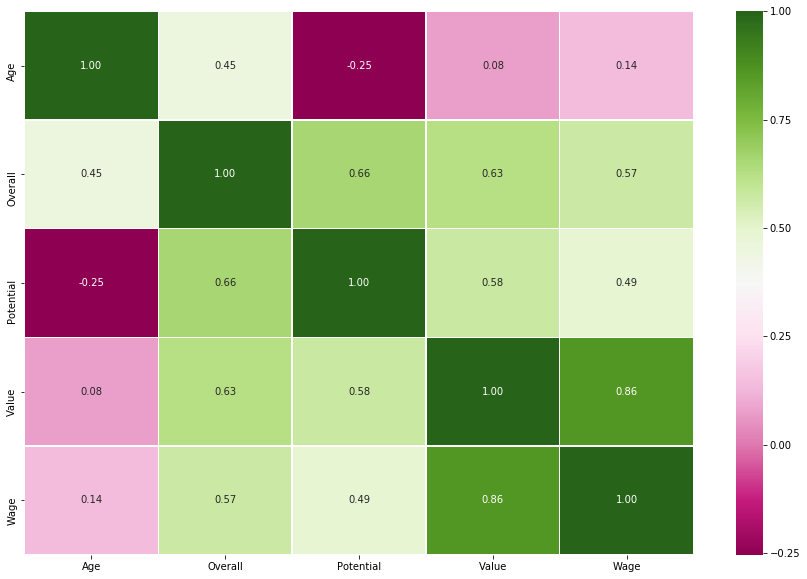

In [11]:
plt.figure(figsize=(15, 10))
plot = sns.heatmap(correlation_fifa.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='PiYG')
plt.show()

1. Overall vs Age (0.45) - 나이가 많은 선수일수록 Overall Rating 이 높다 ( 숙련된 선수일수록 rating이 높음)
2. Overall vs Wage (0.57) - rating 이 높을수록 돈을 더 많이 받는다
3. Overall vs Value (0.63) - rating 이 높을수록 몸값이 높다
4. Overall vs Potential (0.66) - rating 이 높을수록 선수가 가진 potential 이 크다
5. Potential vs Value (0.58) - potential이 클수록 몸값이 높다
6. Value vs Wage (0.86) - 몸값이 높을수록 돈을 더 많이 받는다

# 구단의 평균 Rating에 따른 구단 평균 몸값과 월급

In [12]:
club_mean = fifa.groupby(['Club'])['Overall', 'Potential', 'Wage', 'Value'].mean()

In [13]:
club_mean

,Overall,Potential,Wage,Value
Club,,,,
SSV Jahn Regensburg,65.586207,69.310345,4241.379310,7.963793e+05
1. FC Heidenheim 1846,65.750000,71.928571,4464.285714,9.817857e+05
1. FC Kaiserslautern,63.384615,69.884615,1692.307692,6.228846e+05
1. FC Köln,70.785714,76.571429,13285.714286,4.853929e+06
1. FC Magdeburg,65.615385,70.346154,4884.615385,7.894231e+05
1. FC Nürnberg,68.827586,74.931034,10655.172414,2.677241e+06
1. FC Union Berlin,68.321429,73.357143,13642.857143,1.767321e+06
1. FSV Mainz 05,70.843750,77.281250,15562.500000,4.323594e+06
AC Ajaccio,65.043478,69.782609,3000.000000,8.056522e+05


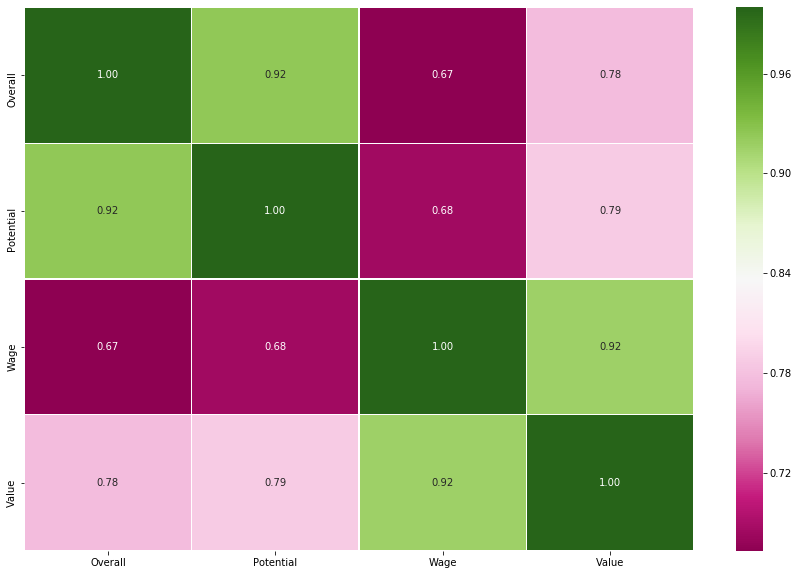

In [14]:
plt.figure(figsize=(15, 10))
plot = sns.heatmap(club_mean.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='PiYG')
plt.show()

구단 평균 Rating과 Potential이 높을수록 구단선수들의 평균 몸값과 월급이 높음

# 선수들 국적에 따른 Overall Rating

In [15]:
nationality = fifa.groupby(['Nationality'])['Nationality', 'Overall', 'Potential', 'Wage', 'Value'].mean()

In [16]:
nationality = nationality.reset_index()

In [17]:
nationality

,Nationality,Overall,Potential,Wage,Value
0,Afghanistan,61.000000,67.750000,1250.000000,3.425000e+05
1,Albania,65.925000,71.700000,7100.000000,1.920250e+06
2,Algeria,70.633333,72.983333,18083.333333,4.670917e+06
3,Andorra,62.000000,64.000000,1000.000000,2.900000e+05
4,Angola,67.600000,71.533333,7666.666667,2.018333e+06
5,Antigua & Barbuda,62.500000,67.750000,2500.000000,5.350000e+05
6,Argentina,68.572038,73.210245,11502.668090,3.077012e+06
7,Armenia,69.000000,71.800000,22000.000000,3.717500e+06
8,Australia,62.652542,68.360169,3351.694915,7.369703e+05
9,Austria,64.916107,69.845638,7667.785235,1.608658e+06


In [46]:
import geopy

In [47]:
from geopy.geocoders import Nominatim

In [57]:
geolocator = Nominatim(timeout = None)
def get_lat(country_name):
    location = geolocator.geocode(country_name)
    if location is None:
        return None
    else:
        return location.latitude

def get_long(country_name):
    location = geolocator.geocode(country_name)
    if location is None:
        return None
    else:
        return location.longitude

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [58]:
get_lat("Central African Republic")

7.0323598

In [59]:
get_long("Belarus")

27.6971358

In [60]:
print(geolocator.timeout)

None


In [61]:
nationality['lat'] = nationality['Nationality'].apply(get_lat)

In [62]:
nationality['long'] = nationality['Nationality'].apply(get_long)

In [63]:
nationality.head(100)

,Nationality,Overall,Potential,Wage,Value,lat,long
0,Afghanistan,61.000000,67.750000,1250.000000,3.425000e+05,33.768006,66.238514
1,Albania,65.925000,71.700000,7100.000000,1.920250e+06,41.000028,19.999962
2,Algeria,70.633333,72.983333,18083.333333,4.670917e+06,28.000027,2.999983
3,Andorra,62.000000,64.000000,1000.000000,2.900000e+05,42.540717,1.573203
4,Angola,67.600000,71.533333,7666.666667,2.018333e+06,-11.877577,17.569124
5,Antigua & Barbuda,62.500000,67.750000,2500.000000,5.350000e+05,17.079128,-61.822252
6,Argentina,68.572038,73.210245,11502.668090,3.077012e+06,-34.996496,-64.967282
7,Armenia,69.000000,71.800000,22000.000000,3.717500e+06,40.769627,44.673665
8,Australia,62.652542,68.360169,3351.694915,7.369703e+05,-24.776109,134.755000
9,Austria,64.916107,69.845638,7667.785235,1.608658e+06,47.200034,13.199959


In [64]:
import numpy
nationality[numpy.isnan(nationality['lat'])]

,Nationality,Overall,Potential,Wage,Value,lat,long
27,Central African Rep.,73.333333,76.0,19000.0,10050000.0,NaN,NaN
51,FYR Macedonia,68.000000,72.5,7900.0,2778750.0,NaN,NaN
85,Korea DPR,65.500000,69.5,4250.0,950000.0,NaN,NaN


In [65]:
get_lat("Central African Republic")

7.0323598

In [66]:
nationality.loc[27,'lat'] = get_lat("Central African Republic")
nationality.loc[27,'long'] = get_long("Central African Republic")

In [67]:
get_lat("North Macedonia")

41.6171214

In [68]:
nationality.loc[51,'lat'] = get_lat("North Macedonia")
nationality.loc[51,'long'] = get_long("North Macedonia")

In [69]:
get_lat("South Korea")

36.5581914

In [70]:
nationality.loc[85,'lat'] = get_lat("North Korea")
nationality.loc[85,'long'] = get_long("North Korea")

In [71]:
import numpy
nationality[numpy.isnan(nationality['lat'])]

,Nationality,Overall,Potential,Wage,Value,lat,long


In [72]:
jet = plt.cm.get_cmap('jet')

In [73]:
lat = []
long = []
overall = []

lat = nationality[['lat']].to_numpy()
long = nationality[['long']].to_numpy()
overall = nationality[['Overall']].to_numpy()

In [74]:
nationality['Overall'].max()

77.0

In [75]:
nationality['Overall'].min()

56.0

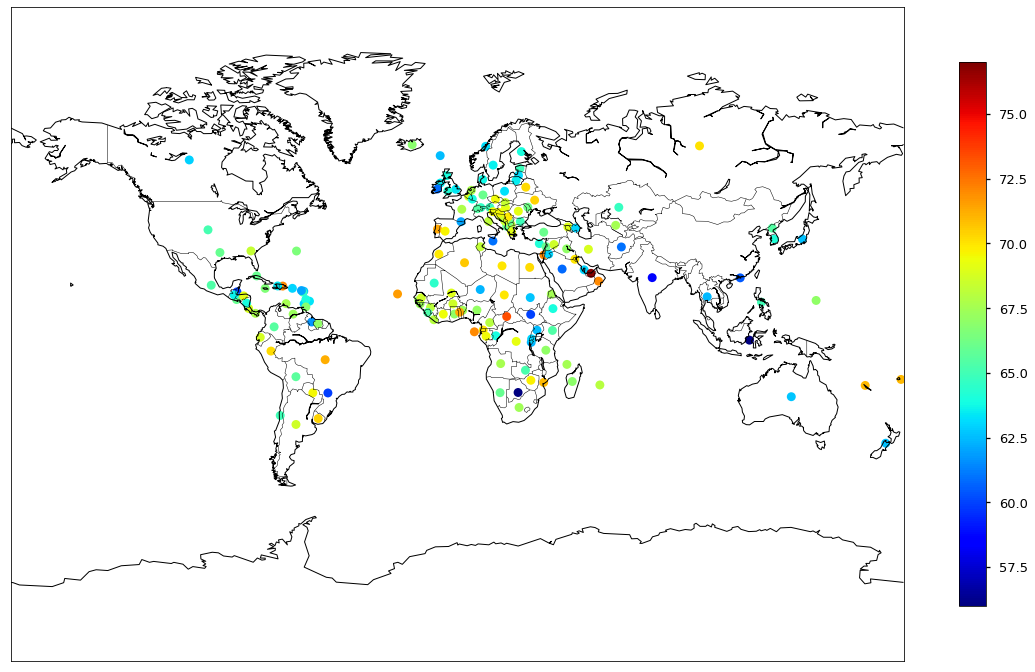

In [76]:
from mpl_toolkits.basemap import Basemap
from matplotlib import style

style.use('seaborn-talk')
plt.figure(figsize=(20,20))
basemap = Basemap(projection = 'mill')
basemap.drawcoastlines()
basemap.drawcountries()
x,y = basemap(long, lat)
sc = plt.scatter(x,y, c=overall, vmin=56, vmax =77, cmap=jet, s=80, edgecolors='none')
cbar = plt.colorbar(sc, shrink = .5)
plt.show()

# 위에 지도가 안이뻐서 

https://ramiro.org/notebook/basemap-choropleth/ 따라하다 실패..

In [77]:
nationality2 = nationality

In [78]:
nationality2

,Nationality,Overall,Potential,Wage,Value,lat,long
0,Afghanistan,61.000000,67.750000,1250.000000,3.425000e+05,33.768006,66.238514
1,Albania,65.925000,71.700000,7100.000000,1.920250e+06,41.000028,19.999962
2,Algeria,70.633333,72.983333,18083.333333,4.670917e+06,28.000027,2.999983
3,Andorra,62.000000,64.000000,1000.000000,2.900000e+05,42.540717,1.573203
4,Angola,67.600000,71.533333,7666.666667,2.018333e+06,-11.877577,17.569124
5,Antigua & Barbuda,62.500000,67.750000,2500.000000,5.350000e+05,17.079128,-61.822252
6,Argentina,68.572038,73.210245,11502.668090,3.077012e+06,-34.996496,-64.967282
7,Armenia,69.000000,71.800000,22000.000000,3.717500e+06,40.769627,44.673665
8,Australia,62.652542,68.360169,3351.694915,7.369703e+05,-24.776109,134.755000
9,Austria,64.916107,69.845638,7667.785235,1.608658e+06,47.200034,13.199959


In [79]:
nationality2 = nationality2.drop(['lat', 'long'], axis =1)

In [80]:
nationality2

,Nationality,Overall,Potential,Wage,Value
0,Afghanistan,61.000000,67.750000,1250.000000,3.425000e+05
1,Albania,65.925000,71.700000,7100.000000,1.920250e+06
2,Algeria,70.633333,72.983333,18083.333333,4.670917e+06
3,Andorra,62.000000,64.000000,1000.000000,2.900000e+05
4,Angola,67.600000,71.533333,7666.666667,2.018333e+06
5,Antigua & Barbuda,62.500000,67.750000,2500.000000,5.350000e+05
6,Argentina,68.572038,73.210245,11502.668090,3.077012e+06
7,Armenia,69.000000,71.800000,22000.000000,3.717500e+06
8,Australia,62.652542,68.360169,3351.694915,7.369703e+05
9,Austria,64.916107,69.845638,7667.785235,1.608658e+06


In [81]:
from geonamescache import GeonamesCache

gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [82]:
import pycountry

input_countries = nationality2['Nationality']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

nationality2['Country Code'] = codes

In [83]:
nationality2[nationality2['Country Code'] == "Unknown code"]

,Nationality,Overall,Potential,Wage,Value,Country Code
5,Antigua & Barbuda,62.500000,67.750000,2500.000000,5.350000e+05,Unknown code
17,Bolivia,65.666667,69.966667,833.333333,2.990000e+05,Unknown code
18,Bosnia Herzegovina,68.639344,72.344262,14868.852459,3.682377e+06,Unknown code
26,Cape Verde,71.631579,73.736842,11526.315789,4.426579e+06,Unknown code
27,Central African Rep.,73.333333,76.000000,19000.000000,1.005000e+07,Unknown code
30,China PR,59.910714,63.719388,3125.000000,3.554209e+05,Unknown code
37,Curacao,67.571429,70.285714,8857.142857,1.648571e+06,Unknown code
39,Czech Republic,69.510000,72.780000,7950.000000,2.837200e+06,Unknown code
40,DR Congo,69.211538,72.384615,13769.230769,3.160481e+06,Unknown code
46,England,63.429603,70.037304,9943.441637,1.498745e+06,Unknown code


In [84]:
nationality2.loc[5, 'Country Code'] = "ATG"
nationality2.loc[17, 'Country Code'] = "BOL"
nationality2.loc[18, 'Country Code'] = "BIH"
nationality2.loc[26, 'Country Code'] = "CPV"
nationality2.loc[27, 'Country Code'] = "CAF"
nationality2.loc[30, 'Country Code'] = "CHN"
nationality2.loc[37, 'Country Code'] = "CUW"
nationality2.loc[39, 'Country Code'] = "CZE"
nationality2.loc[40, 'Country Code'] = "COD"
nationality2.loc[46, 'Country Code'] = "GBR"
nationality2.loc[51, 'Country Code'] = "MKD"
nationality2.loc[66, 'Country Code'] = "GNB"
nationality2.loc[75, 'Country Code'] = "IRN"
nationality2.loc[79, 'Country Code'] = "CIV"
nationality2.loc[85, 'Country Code'] = "PRK"
nationality2.loc[86, 'Country Code'] = "KOR"
nationality2.loc[87, 'Country Code'] = "RKS"
nationality2.loc[102, 'Country Code'] = "MDA"
nationality2.loc[114, 'Country Code'] = "GBR"
nationality2.loc[117, 'Country Code'] = "PSE"
nationality2.loc[126, 'Country Code'] = "IRL"
nationality2.loc[128, 'Country Code'] = "RUS"
nationality2.loc[131, 'Country Code'] = "GBR"
nationality2.loc[140, 'Country Code'] = "KNA"
nationality2.loc[141, 'Country Code'] = "LCA"
nationality2.loc[146, 'Country Code'] = "SYR"
nationality2.loc[147, 'Country Code'] = "STP"
nationality2.loc[148, 'Country Code'] = "TZA"
nationality2.loc[151, 'Country Code'] = "TTO"
nationality2.loc[160, 'Country Code'] = "VEN"
nationality2.loc[161, 'Country Code'] = "GBR"

In [85]:
nationality2[nationality2['Country Code'] == "Unknown code"]

,Nationality,Overall,Potential,Wage,Value,Country Code


In [86]:
nationality2 = nationality2.drop(['Nationality'], axis =1)

In [87]:
nationality2 = nationality2.groupby(['Country Code'])['Overall', 'Potential', 'Wage', 'Value', 'Country Code'].mean()

In [116]:
 nationality2.sort_values(by=['Overall'], ascending=False)

,Overall,Potential,Wage,Value,bin
Country Code,,,,,
ARE,77.000000,78.000000,39000.000000,1.050000e+07,4
CAF,73.333333,76.000000,19000.000000,1.005000e+07,3
ISR,72.142857,73.000000,15857.142857,4.191071e+06,3
OMN,72.000000,72.000000,12000.000000,4.250000e+05,3
DOM,72.000000,80.500000,71000.000000,1.040000e+07,3
STP,72.000000,72.000000,15000.000000,2.800000e+06,3
CPV,71.631579,73.736842,11526.315789,4.426579e+06,2
PRT,71.344720,75.298137,14310.559006,5.063665e+06,2
TGO,71.333333,72.916667,16000.000000,3.770833e+06,2


c:\python37\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


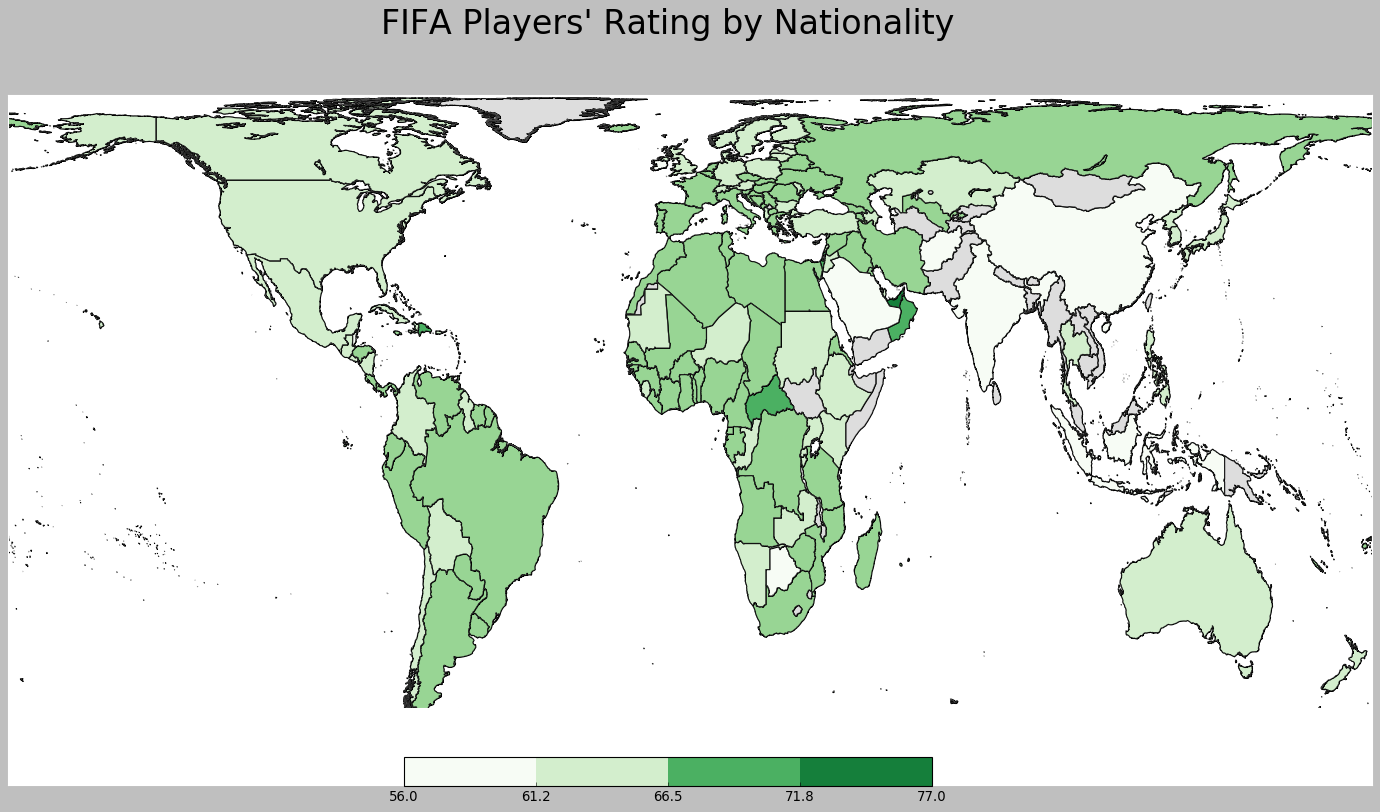

In [111]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib as mpl

values = nationality2['Overall']
num_colors = 5
cm = plt.get_cmap('Greens')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = numpy.linspace(values.min(), values.max(), num_colors)
nationality2['bin'] = numpy.digitize(values, bins) - 1
nationality2.sort_values('bin', ascending=False).head(100)

mpl.style.use('classic')
fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111, frame_on=False)
fig.suptitle('FIFA Players\' Rating by Nationality', fontsize=30, y=.95)

#m = Basemap(lon_0=0, projection='robin')
m =Basemap(projection='cea', lat_ts=37.5)
m.drawmapboundary(color='w')


shapefile = 'ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes'
m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)

for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in nationality2.index:
        color = '#dddddd'
    else:
        color = scheme[int(nationality2.ix[iso3]['bin'])]

    patches = [Polygon(numpy.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)
                      

ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

plt.show()

#description = '''FIFA 선수 국적별 평균 rating'''
#plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')